# **Momento de Retroalimentación: Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework. (Portafolio Implementación)**

## **Instrucciones**

**Entregable:** Implementación de una técnica de aprendizaje máquina sin el uso de un framework.

1. Crea un repositorio de GitHub para este proyecto.
2. Programa uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice) sin usar ninguna biblioteca o framework de aprendizaje máquina, ni de estadística avanzada. Lo que se busca es que implementes manualmente el algoritmo, no que importes un algoritmo ya implementado.
3. Prueba tu implementación con un set de datos y realiza algunas predicciones. Las predicciones las puedes correr en consola o las puedes implementar con una interfaz gráfica apoyándote en los visto en otros módulos.
4. Después de la entrega intermedia se te darán correcciones que puedes incluir en tu entrega final.

## **Acerca de los datos...**

Elegí este dataset debido a que me intrigó un poco el desempeño de las películas de superhérores, en concreto las de Marvel, debido a que estas actualmente se encuentran en un gran declive y si las comparamos con las películas de hace no muchos años, presentaban mejores resultados en cuanto a recaudaciones y opiniones populares. Para este entregable, he optado por elegir los datos relacionados a las ganancias generadas durante el fin de semana de apertura y el segundo fin de semana, ya que en primera instancia debe existir una relación en base al recibimiento del público durante la primera semana y la segunda.

### **¿Qué se espera hacer con este dataset?**

Más que nada, quiero generar una predicción o estimación de datos entre la primera y segunda semana de recaudación ($MUSD). Esto con el fin de poner en práctica los conocimientos adquiridos durante estas semanas de clases acerca de modelos de Machine Learning.

### **¿Qué modelo se utilizará?**

Pensé en aplicar regresión lineal o logística, sin embargo y como no tuvimos mucho tiempo para implementarlo en clase, me decidí en implementar la regresión polinomial, de la cual realicé el ejercicio encargado en clase para prácticar y espero que con ello este entregable arroje resultados aproximados a los esperados.

Se tomarán en cuenta los primeros 20 datos de la columna "opening weekend" para entrenamiento, y los últimos 10 datos se destinarán para generar estimaciones con respecto a la columna "second weekend". Es así que comprobaremos si el algoritmo logra estimar las recaudaciones que se generarán el fin de semana siguiente a el fin de semana de apertura.

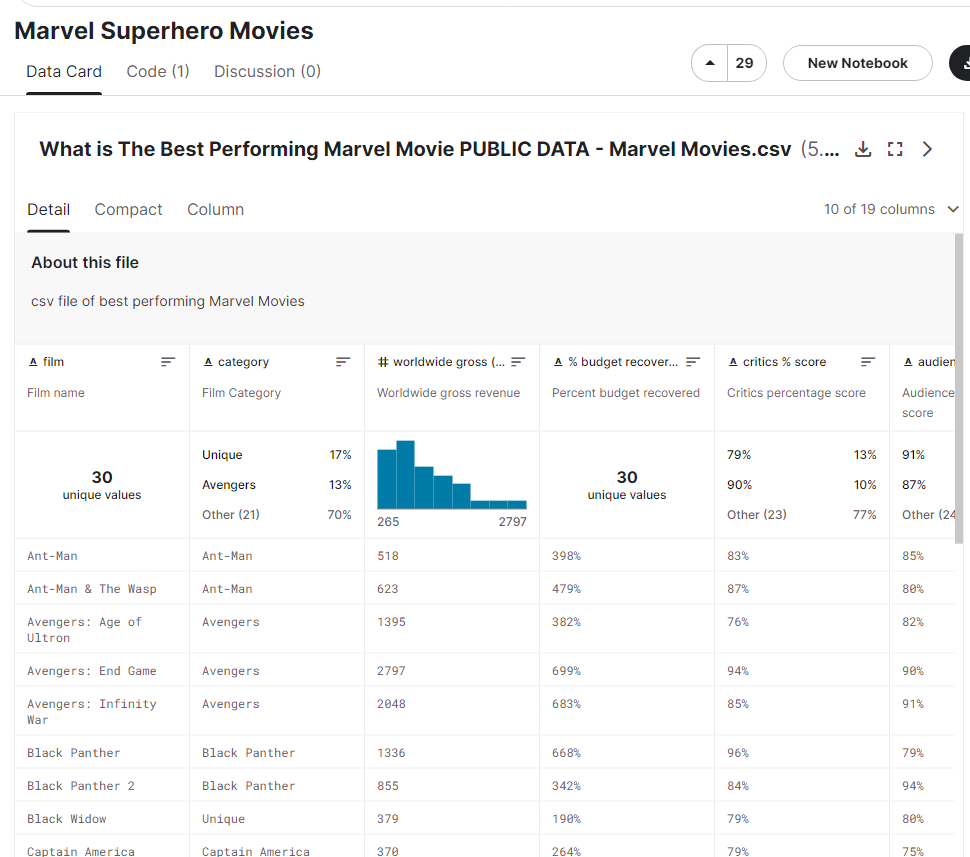

## **Antes de empezar**
Lo primero que debemos hacer es cargar los datos (listas), librerías y declarar valores iniciales de los hiper-parámetros. Para ello, debemos:

Ejecutar esta celda solo si estas utilizando Google Colab. Se deberá subir el archivo CSV a nuestro Drive y montarlo dentro de Colab:

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Colocamos la ruta dónde se encuentra el archivo CSV y extraemos los datos que vamos a analizar:

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

# Editar el path de ser necesario
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Marvel_Movies.csv')

# Extraemos las columnas con datos para generar una predicción:
# Lista con todos los valores de la variable independiente
xAll = data['opening weekend ($m)'].astype(float).values.tolist()
# Lista con todos los valores de la variable dependiente
yAll = data['second weekend ($m)'].astype(float).values.tolist()

# Lista con los valores de entrenamiento de la variable independiente
x = xAll[:20]
# Lista con el resto de los valores de validación de la variable independiente
xVal = xAll[20:]
# Lista con los valores a considerar de la variable dependiente
y = yAll[:20]

# Lista con los hiper-parámetros iniciales (thetas)
theta = [0.000000055, 0.000000065, 0.000000075, 0.000000085, 0.000000095]
# Valor de learningRate (alpha)
alpha = 0.000000000000000000000000001

Establecemos la función de hipótesis a utilizar. En este caso utilizaremos la regresión polinomial, por ende necesitaremos el módulo **math**:

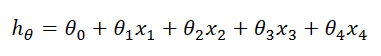

In [154]:
# Importamos el módulo math
import math

# Crear función lambda para la función de hipótesis
h = lambda x, theta: theta[0] + (theta[1] * x) + (theta[2] * pow(x, 2)) + (theta[3] * pow(x, 3)) + (theta[4] * pow(x, 4))
# Calculamos el total de las muestras a partir de los datos (n)
n = len(x)

También necesitamos una variable para el total de iteraciones, con el fin de garantizar que ambos métodos se entrenen bajo las mismas condiciones:

In [155]:
m = 50

## N Iteraciones

In [156]:
# Implementamos el ciclo para m iteraciones
for i in range (0, m):
  # Creamos los acumuladores
  delta = []
  deltaX1 = []
  deltaX2 = []
  deltaX3 = []
  deltaX4 = []
  # Recorremos el dataset
  for xi, yi in zip(x, y):
    # Resultado de la función de hipótesis de cada muestra
    pred = h(xi, theta)
    # Calculamos delta para theta0 y para cada muestra
    delta.append(pred - yi)
    # Calculamos delta para theta1 y para cada muestra
    deltaX1.append((pred - yi) * xi)
    # Calculamos delta para theta2 y para cada muestra
    deltaX2.append((pred - yi) * pow(xi, 2))
    # Calculamos delta para theta3 y para cada muestra
    deltaX3.append((pred - yi) * pow(xi, 3))
    # Calculamos delta para theta4 y para cada muestra
    deltaX4.append((pred - yi) * pow(xi, 4))

  # Calcular sumatorias y promedio
  dJt0 = 1/n * sum(delta)
  dJt1 = 1/n * sum(deltaX1)
  dJt2 = 1/n * sum(deltaX2)
  dJt3 = 1/n * sum(deltaX3)
  dJt4 = 1/n * sum(deltaX4)

  # print("Iteración", (i + 1))

  # Actualizamos el valor de theta
  theta[0] = theta[0] - (alpha * dJt0)
  theta[1] = theta[1] - (alpha * dJt1)
  theta[2] = theta[2] - (alpha * dJt2)
  theta[3] = theta[3] - (alpha * dJt3)
  theta[4] = theta[4] - (alpha * dJt4)

  # print("Valor de theta: ", theta, "\n")

print("Valor final de theta: ", theta, "\n")

Valor final de theta:  [5.5e-08, 6.499999999999868e-08, 7.49999999994931e-08, 8.499999982514857e-08, 9.499993926084518e-08] 



# Evaluación

En esta parte realizaremos la estimación para cada uno de los valores de validación:

In [157]:
yEst = y

for xi in xVal:
  est = h(xi, theta)
  yEst.append(est)
  print(est)

87.53044514837225
3.042143633101411
7.175514671254668
17.939088552887412
435.62596938856666
175.18053991412557
5.011804284270772
41.10360825775309
21.201136228927606
1.7194725707201037


## Gráfica de Datos Reales

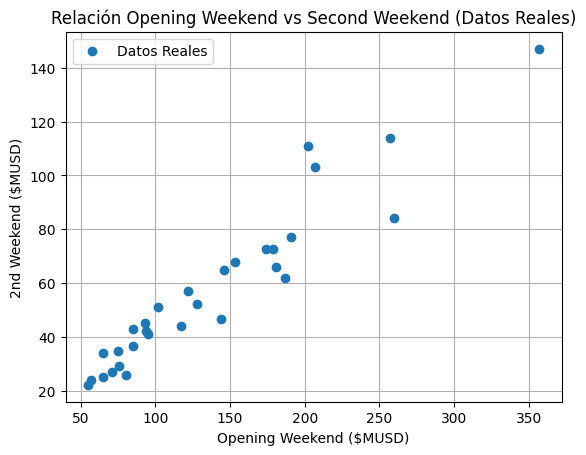

In [158]:
plt.plot(xAll, yAll, marker='o', linestyle='none', label='Datos Reales')

plt.grid()

plt.xlabel('Opening Weekend ($MUSD)')
plt.ylabel('2nd Weekend ($MUSD)')
plt.title('Relación Opening Weekend vs Second Weekend (Datos Reales)')

plt.legend()

plt.show()

## Gráfica de Datos Reales y Datos Estimados

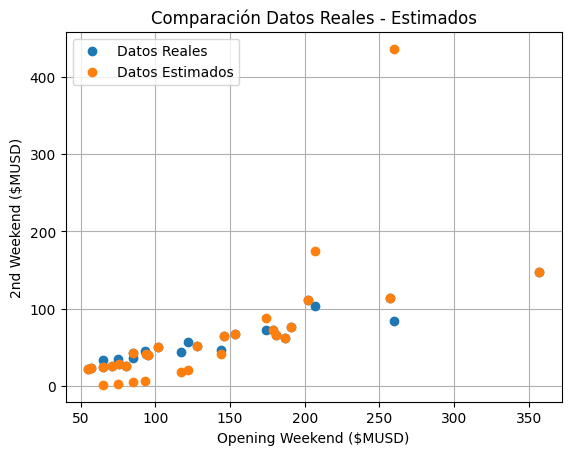

In [159]:
plt.plot(xAll, yAll, marker='o', linestyle='none', label='Datos Reales')
plt.plot(xAll, yEst, marker='o', linestyle='none', label='Datos Estimados')

plt.grid()

plt.xlabel('Opening Weekend ($MUSD)')
plt.ylabel('2nd Weekend ($MUSD)')
plt.title('Comparación Datos Reales - Estimados')

plt.legend()

plt.show()

## Tabla Comparativa de Visualización de Datos

In [160]:
from tabulate import tabulate

table_data = list(zip(xAll, yAll, yEst))

headers = ['Opening Weekend ($MUSD)', '2nd Weekend ($MUSD)', 'Estimated 2nd Weekend ($MUSD)']

table = tabulate(table_data, headers=headers, tablefmt='pretty')

print(table)

+-------------------------+---------------------+-------------------------------+
| Opening Weekend ($MUSD) | 2nd Weekend ($MUSD) | Estimated 2nd Weekend ($MUSD) |
+-------------------------+---------------------+-------------------------------+
|          57.0           |        24.0         |             24.0              |
|          75.8           |        29.0         |             29.0              |
|          191.0          |        77.0         |             77.0              |
|          357.0          |        147.0        |             147.0             |
|          257.0          |        114.0        |             114.0             |
|          202.0          |        111.0        |             111.0             |
|          181.0          |        66.0         |             66.0              |
|          80.3           |        25.8         |             25.8              |
|          65.0           |        25.0         |             25.0              |
|          179.0

## Conclusión

Considero que este modelo no es perfecto ni de lejos, sin embargo intenté otorgarle los mejores parámetros que pude para que los valores estimados fueran lo más cercanos a los valores reales. Jugué bastante con el learningRate, el número de iteraciones y los valores iniciales de theta para probar diversas combinaciones y finalmente llegar a unos resultados, que si bien no son enteramente certeros, al menos se aproximan un poco a lo que es la realidad.

Evidentemente este modelo puede mejorar si sigo cambiando los valores de los parámetros, inclusive se tendrían que hacer algunos análisis a los datos y al comportamiento del algoritmo para determinar su desempeño y comprender de mejor forma cuál sería la mejor configuración para adaptar este modelo y que retorne los valores más precisos, pero de momento me quedo satisfecho con el trabajo hecho ya que no tuvimos un ejercicio en clase realizando este tipo de predicciones con regresión polinomial, y al final creo que no salió tan mal como lo esperaba.